##### The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included.

In [194]:
import pandas as pd  
import numpy as np  
import datetime  

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                   index_col=["ISO_Code", "Year"],
                   parse_dates=True)
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)
data = data[
    data.index.get_level_values("Year") > datetime.datetime(2000, 1, 1)]

for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])


In [195]:
data

EFW  Size of Government  ...  Log RGDP Per Capita  Log RGDP Per Capita Lag
ISO_Code Year                                      ...                                              
ALB      2017-01-01  7.673511            7.528167  ...                  NaN                 9.243969
         2016-01-01  7.637742            7.875862  ...             9.243969                 9.213535
         2015-01-01  7.639666            7.904257  ...             9.213535                 9.190954
         2014-01-01  7.586769            7.882037  ...             9.190954                 9.175749
         2013-01-01  7.389525            7.807904  ...             9.175749                 9.168685
...                       ...                 ...  ...                  ...                      ...
ZWE      2005-01-01  2.889240            4.291101  ...             7.319865                 7.391415
         2004-01-01  3.181057            5.184469  ...             7.391415                 7.451242
         2003-01-01  3.675260            5.709175  ...             7.451242                 7.627544
         2002-01-01  3.625483            5.514469  ...             7.627544                 7.708860
         2001-01-01  3.633489            5.547411  ...             7.708860                 7.718241

[2466 rows x 10 columns]

In [189]:
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)  
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
  
for key in data:  
    if "GDP" in key:  
        data["Log " + key] = np.log(data[key])  
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()  
  
# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

In [208]:
data["Regulation Change"] = data["Regulation"].pct_change(periods=5)

In [209]:
data

EFW  Size of Government  ...  EFW Change  Regulation Change
ISO_Code Year                                      ...                               
ALB      2017-01-01  7.673511            7.528167  ...         NaN                NaN
         2016-01-01  7.637742            7.875862  ...   -0.004661                NaN
         2015-01-01  7.639666            7.904257  ...    0.000252                NaN
         2014-01-01  7.586769            7.882037  ...   -0.006924                NaN
         2013-01-01  7.389525            7.807904  ...   -0.025998                NaN
...                       ...                 ...  ...         ...                ...
ZWE      2005-01-01  2.889240            4.291101  ...   -0.040932          -0.076376
         2004-01-01  3.181057            5.184469  ...    0.101001          -0.025943
         2003-01-01  3.675260            5.709175  ...    0.155358           0.064258
         2002-01-01  3.625483            5.514469  ...   -0.013544           0.096282
         2001-01-01  3.633489            5.547411  ...    0.002208           0.000387

[2466 rows x 13 columns]

### I'm adding a new variable: "Regualtion change". Perhaps, the speed with which a country decreases regulation will correlayte with RGDPPC. 

<ipython-input-214-2449b35ec6cb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-214-2449b35ec6cb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-214-2449b35ec6cb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

RGDP Per Capita Lag
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.617
Model:                             OLS   Adj. R-squared:                  0.616
Method:                  Least Squares   F-statistic:                     491.1
Date:                 Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                         15:34:19   Log-Likelihood:                -2462.3
No. Observations:                 2144   AIC:                             4941.
Df Residuals:                     2136   BIC:                             4986.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

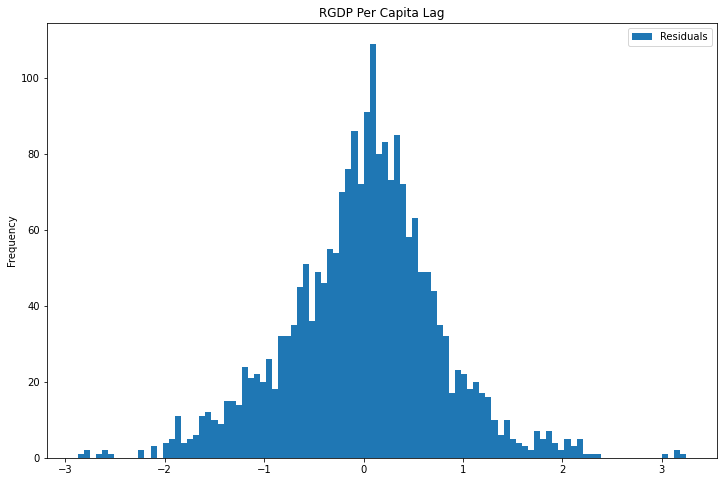

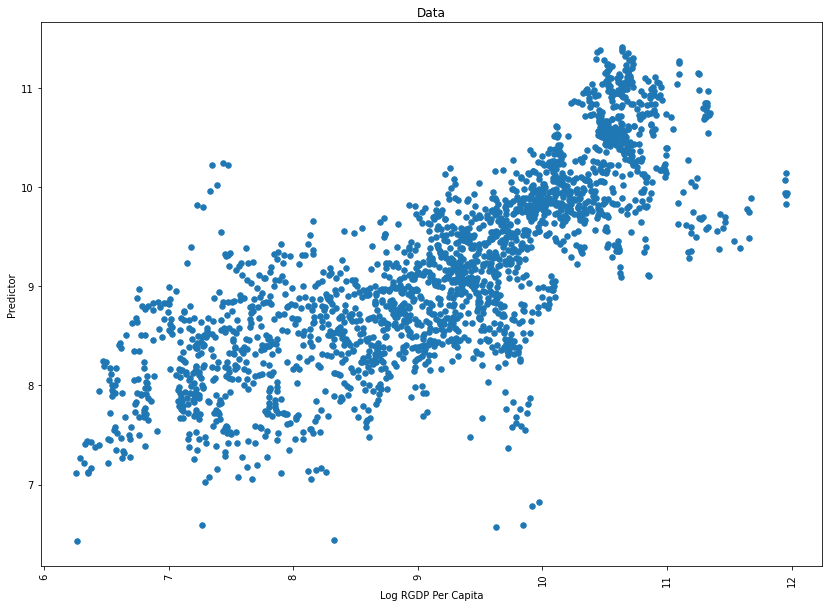

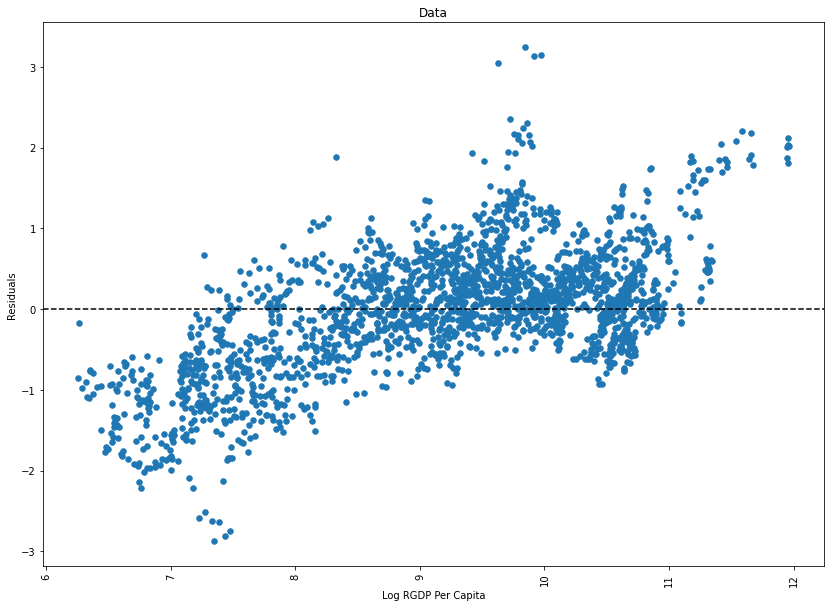

In [214]:

# . . . .
y_name = ["Log RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
                     "Sound Money",
          "Freedom to trade internationally", 
          "Regulation", 
          "Regulation Change"]

for i in range(1):  # didnt want to delete the indents 
            reg_data = data.dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = sm.OLS(Y,X)
            results = model.fit()
            print(key, results.summary(), sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key)

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title('Data')
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title('Data')
            plt.show()
            plt.close()

These residuals are still correlated with Log RGDP Per Capita, but the correlation is less severe than many of the models we produced in class. Honestly, I'm struggling to think of good ways to have residuals not be correlated with RGDPPC because the nature of values growing larger over time suggests that the residuals will be more extreme over time. Logging the data does a decent job but its not perfect. 